# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.1 What is SGD or Stochastic Gradient Descent?

> First post (own_tutorial_1.ipynb).
> Second post (own_tutorial_2.ipynb).
> Previous post (own_tutorial_3.ipynb).


**Gradient Descent — Trick developed in 1847 is now the first step in the field of Neural Networks**

Step by step implementation with animation for better understanding.

This post is divided into 3 sections

1. SGD in 1 Variable function
2. SGD Animation for 1 variable function
3. SGD in multi-variable function

**SGD in 1 variable function**
Suppose, we need to find the minima of this function.

In [1]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \text{We will use calculus for this. We will simply take the derivative of the functions and equate it to 0.}\\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\
    f^\prime(x) = 0 \\
    \text{Which gives us} \\
    1 - 3x^{2} = 0 \, \Rightarrow \, x = \pm \frac{1}{\sqrt{3}} \\
    \text{The points will either be minima, or maxima, or points of inflection.} \\
    \text{For minima, the second derivative should be positive.} \\
    \frac{d^{2}y}{dx^{2}} = f''(x) = -6x \\
    f''(\frac{1}{\sqrt{3}})=-6(\frac{1}{\sqrt{3}})=-2\sqrt{3}<0 \\
    \text{and,}\\
    f''(\frac{-1}{\sqrt{3}})=-6(\frac{-1}{\sqrt{3}})=2\sqrt{3}>0 \\
    \text{So, the minima is at}\\
    x= \frac{-1}{\sqrt{3}} \, \text{ or } -0.577
\end{gather*}

<IPython.core.display.Latex object>

Here is the graph of the function.

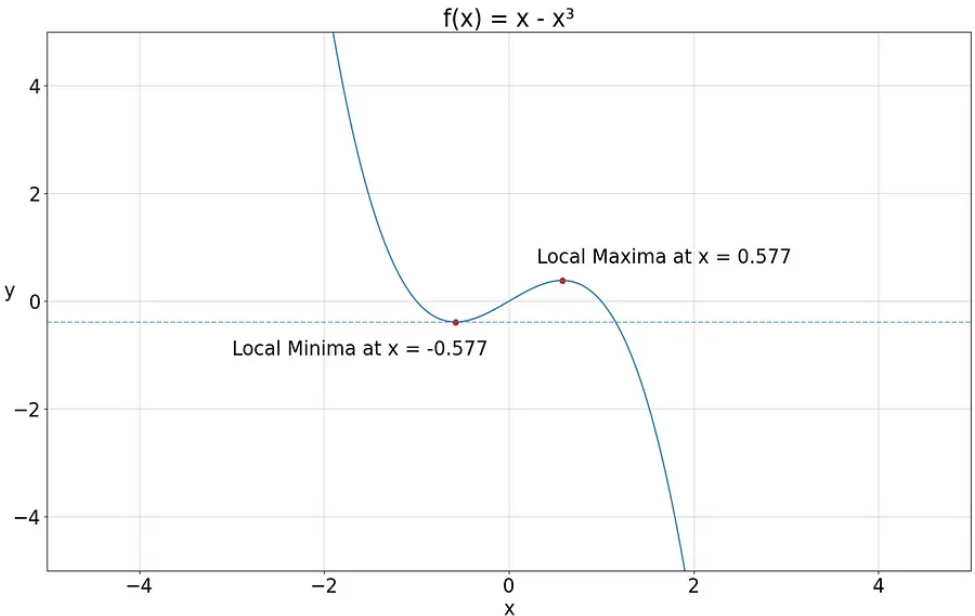

But how will the computer find the local minima? They can’t do what we did.

This is where we use the **SGD** or *Stochastic Gradient Descent* or simply the **Gradient Descent**.

We will use the analogy of a ball sliding down the hill.

We will also slide down the function to reach the minima.

First, we will start at a random point on the function. We are starting from **x = -1**

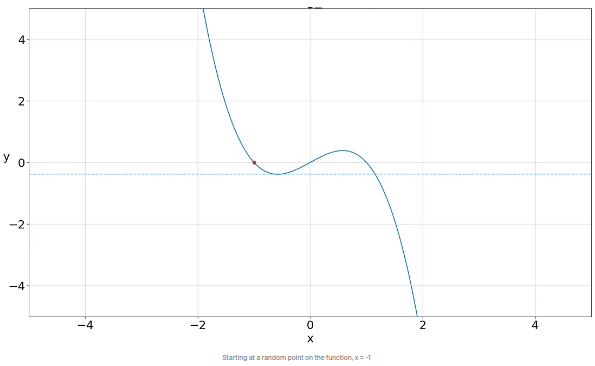

Then we use the fact that 

**derivative** or **gradient**

gives us the steepest ascent.

So, the negative gradient gives us the steepest descent.

The magnitude of the gradient is not ideal to use. So, we will multiply it with a scalar called **‘Learning rate’**. The learning rate is generally in the range of *0.01 to 0.001*

The product of negative gradient and learning rate will be our update and we will add the update to the point.

So, SGD algorithm in very simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - Initiate loop

>        Step 2.1 - Calculate update = - learning_rate * gradient

>        Step 2.2 - add the update to point

Let us see how to implement SGD in Python.

First, we will define the function definition and function derivative definition.

In [2]:
import numpy as np
np.random.seed(42)

def f(x):
    return x - x ** 3

def fdash(x):                  # gradient
    return 1 - 3 * (x ** 2)

And now it is time to write the steps of SGD

In [3]:
point = -1                                  # step 1
learning_rate = 0.1

for i in range(1000):                       # step 2
    update = - learning_rate * fdash(point) # step 2.1
    point += update                         # step 2.2

print(point)                                # minima

-0.5773502691896258


### SGD Animation for better understanding

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

point_sgd = [-1]                             # initiating list with
                                             # starting point in it

point = -1                                   # step 1
learning_rate = 0.01
for i in range(1000):                        # step 2  
    update = - learning_rate * fdash(point)  # step 2.1
    point += update                          # step 2.2
    
    point_sgd.append(point)                  # adding updated point
                                             # to the list   
   
print(point)
print(point_sgd)                                # Minima

-0.5773502691896273
[-1, -0.98, -0.9611879999999999, -0.9434715288596799, -0.9267673730866153, -0.9110004401720793, -0.8961027861122676, -0.8820127800139225, -0.8686743836906858, -0.856036528144274, -0.8440525720187549, -0.8326798296888107, -0.8218791587256931, -0.8116145981792635, -0.8018530504999329, -0.7925640010620515, -0.7837192701886668, -0.7752927933547151, -0.7672604258918824, -0.7595997690576886, -0.7522900147831137, -0.7453118067928424, -0.738647116112498, -0.7322791292482587, -0.7261921475542811, -0.7203714964991961, -0.7148034437101414, -0.7094751248159451, -0.7043744762339671, -0.6994901741508708, -0.6948115790388623, -0.6903286851278679, -0.6860320743225568, -0.6819128741125775, -0.6779627190761632, -0.6741737156224489, -0.6705384096573636, -0.6670497568925887, -0.6637010955474749, -0.6604861212205474, -0.6573988637307985, -0.6544336657497621, -0.651585163063762, -0.6488482663220171, -0.6462181441407445, -0.6436902074462433, -0.6412600949513777, -0.6389236596700663, -0.63

We will do some settings for our graph for the animation. It is easy to change them if we need something different.

Text(0.5, 1.0, 'SGD, learning rate = 0.01')

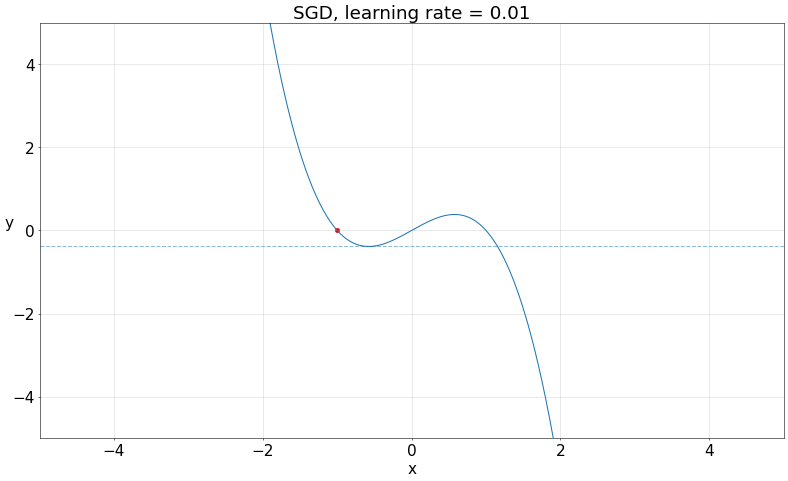

In [5]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(dpi = 50)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()
ax.plot(x_,y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red')
ax.hlines(f(-0.5773502691896273), -5, 5, linestyles='dashed', alpha=0.5)

ax.set_title('SGD, learning rate = 0.01')

Now we will animate the SGD optimizer.

In [6]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('SGD, learning_rate = 0.01')

    ax.scatter(point_sgd[i], f(point_sgd[i]), color = 'red')

anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)

anim.save('2.1.SGD.gif')

### SGD in multi-variable function (2 variables right now)

The trick is the same, every step is the same but for every variable, we will use the partial derivative of the function w.r.t that variable to calculate the update.

But first, let us define the function and its partial derivatives.

We are using this function

In [18]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1) \textcolor{red}{¿From where we know this?}} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
        \\
        \textcolor{orange}{Because (\because) \, of } \\
        ------------------ \\
        \text{Ginven, } u = y^{x} \\
        \text{We need to find partial derivative} \\
        1. \underline{w.r.t \, x} \, \text{(with respect to ... x)} \\
            \text{In partial derivative if it`s asked to differentiate} \\
            \text{w.r.t one variable (here it is 'x') then all other} \\
            \text{variables{ will be treated as constants.}} \\
            \text{Here it is w.r.t $x$} \, \therefore \, \text{$y$ will be constant} \\
            \\
                \textbf{If: } f(x) = a^{x}; \,\, a = const \\
                \textbf{Then: } {f}\'(x) = a^x \, ln \,a \\
            \\
            \text{Here } u = y^x; y = const. \\
            \therefore \, u' = y^x \, ln \, y \\ \text{(y is const, x is variable)}\\
        \\
        2. \underline{w.r.t \, y} \, \text{(with respect to ... y)} \\
            \text{Here 'x' will be treated as const}
                \\
                \textbf{If: } f(x) = x^{a}; \,\, x = const \\
                \textbf{Then: } {f}\'(x) = ax^{a-1} \\
            \\
            \text{Here } u = y^x \\
            \therefore \, u' = xy^{x-1} \\ \text{(x is const, y is variable)}\\
        ------------------ \\


\end{gather*}

<IPython.core.display.Latex object>

In [8]:
def f(x, y):
    return 2*(x**2) + 2*x*y + 2*(y**2 ) - 6*x   # function

def fdash_x(x, y):                              # partial derivative w.r.t x
    return 4*x + 2*y -6

def fdash_y(x, y):                              # partial derivative w.r.t y
    return 2*x + 4*y

Now we will create an array of gradients that will store partial derivatives in the shape (-1, 1) and an array for points to store ‘x’ and ‘y’ also in the shape (-1, 1). In this case, -1 is equivalent to 2.

In [9]:
%%latex
\begin{gather*}
    \textit{gradient } = 
    \begin{bmatrix}
        \frac{\partial f}{\partial  x}\\
        \\
        \frac{\partial f}{\partial  y}
    \end{bmatrix}\\
    \\
    \textit{point } = 
    \begin{bmatrix}
        x
        \\
        y
    \end{bmatrix}
\end{gather*}

<IPython.core.display.Latex object>

In [10]:
def gradient(point):
    return np.array([[fdash_x(point[0][0], point[1][0])],
                     [fdash_y(point[0][0], point[1][0])]],
                     dtype = np.float64)         # gradients        

We can see that the shape of gradient and point is (2, 1)

Now, we can calculate the update in matrix form like this

In [11]:
%%latex
\begin{gather*}
    \begin{bmatrix}
        update\_x \\
        \\
        update\_y
    \end{bmatrix} = 
    \begin{bmatrix}
        -learning\_rate * \frac{\partial f}{\partial  x}\\
            \\
        -learning\_rate * \frac{\partial f}{\partial  y}\\        
    \end{bmatrix}\\
    \\
    \text{And we can reduce it to a single line in Python like this} \\
    \begin{bmatrix}
        update\_x \\
        \\
        update\_y
    \end{bmatrix} = -learning\_rate \, * 
    \begin{bmatrix}
        \frac{\partial f}{\partial  x}\\
        \\
        \frac{\partial f}{\partial  y}
    \end{bmatrix} \Rightarrow \\
    \Rightarrow update = - learning\_rate \, * \, gradient \\
    \\
    \text{And we can add the update to point in matrix form like this}\\
    \begin{bmatrix}
        x \\
        \\
        y
    \end{bmatrix} +=
        \begin{bmatrix}
        update\_x \\
        \\
        update\_y
    \end{bmatrix} \Rightarrow \\
    \Rightarrow point += update


\end{gather*}

<IPython.core.display.Latex object>

So, we will do exactly the same as what we did earlier in 1 variable. All the steps are the same, but we will initialize point (1, 0) with shape (2, 1) and will replace fdash(point) with gradient(point).

In [12]:
point = np.array([[1],                          # step 1
                  [0]], dtype = np.float64)
learning_rate = 0.1

for i in range(1000):                            # step 2
    update = -learning_rate * gradient(point)    # step 2.1
    point += update                              # step 2.2

point                                      # Minima

array([[ 2.],
       [-1.]])

The only difference is that we initialize 

point (1, 0) with shape (2, 1) 

and because the gradient is of shape (2, 1), 

the update is also of shape (2, 1).

Now as a bonus, let us talk about a few things which can go **wrong** with Gradient Descent.

1. Overshooting

In [13]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}


<IPython.core.display.Latex object>

In [14]:
point = -100
learning_rate = 0.01

for i in range(1000):
    update = - learning_rate * fdash(point)
    point += update

    print(point)

199.99
1399.8600030000002
60188.090842974816
108738376.46050864
354721144196395.44
3.774812704200354e+27
4.274763285537716e+53
5.482080344214362e+105
9.015961470126438e+209


OverflowError: (34, 'Numerical result out of range')

Suppose that the update size happens to be big due to any reason, in this case, due to the magnitude of the starting point. We can see that we have crossed the maxima and now we will go all the way to infinity resulting in overflow error.

> This is called **‘Overshooting’** in which we overshoot. This can be avoided by proper selection of starting point and learning rate.

2.  Oscillation

In [ ]:
%%latex
\begin{gather*}
    y = f(x) = x^2 + x +1 \\
    \frac{dy}{dx} = f'(x) = 2x +1 \\  
\end{gather*}

<IPython.core.display.Latex object>

In [ ]:
def f(x):
    return x**2 + x + 1

def fdash(x):                  # gradient
    return 2*x + 1

point = -10
learning_rate = 1

for i in range(10):
    update = - learning_rate * fdash(point)
    point += update

    print(point)

9
-10
9
-10
9
-10
9
-10
9
-10


We can see here that due to symmetry we are in a loop where we jump from one point to another and back.

This is highly unlikely to occur. This can be avoided by proper selection of starting point and learning rate.

3. Divergence

In [ ]:
point = -100
learning_rate = 2

for i in range(10):
    update = - learning_rate * fdash(point)
    point += update

    print(point)

298
-896
2686
-8060
24178
-72536
217606
-652820
1958458
-5875376


Here instead of converging, we are actually diverging.

It happens a lot and in Deep Learning, where the loss gets big and big with training. This can be avoided by proper selection of starting point and learning rate.

4. Different initial point leads to different Minima

In [ ]:
%%latex
\begin{gather*}
    y = f(x) = x^4 + 3x^3 + 2x^2 \\
    \frac{dy}{dx} = f'(x) = 4x^3 + 9x^2 + 4x \\  
    \\
    \text{If we start from x = 0.60, then we will end at x = 0 for minima which is local}
\end{gather*}

<IPython.core.display.Latex object>

In [ ]:
def f(x):
    return x**4 + 3*x**3 + 2*x**2

def fdash(x):                  # gradient
    return 4*x**3 + 9*x**2 + 4*x

point = -0.6
learning_rate = 0.01

for i in range(1000):
    update = - learning_rate * fdash(point)
    point += update

print(point)

-7.907574965136881e-16


But, if we start from x = -0.61, then we will end at x = -1.604 for minima which is global

In [ ]:
point = -0.61
learning_rate = 0.01

for i in range(1000):
    update = - learning_rate * fdash(point)
    point += update

print(point)

-1.6403882032022061


5. Gradients are very very small

In [ ]:
%%latex
\begin{gather*}
    y = f(x) = x^{10} \\
    \frac{dy}{dx} = f'(x) = 10x^9 \\  
    \\
    \text{Suppose our derivative is of very high power, in that case, even 100 million}\\
    \text{iterations will not lead us to the Minima, in this case, 0.}
\end{gather*}

<IPython.core.display.Latex object>

In [21]:
def f(x):
    return x**10

def fdash(x):                  # gradient
    return 10*x**9

point = -1
learning_rate = 0.01

for i in range(100000000):
    update = - learning_rate * fdash(point)
    point += update

print(point)

-0.10282851738360138


It is highly unlikely that we have to deal with such small gradients. Either start from a point close to minima or increase the learning rate.

**Most of the time these things will not be a problem to us but the problem of loss divergence is very common in Deep Learning.**